# predicting heart disease using machine learning

this noatbook looks into various python bases ML and DS liabraries in and attempt to build a machine learning model capable of predicting wheeter or not someon has heart disease base on theri medical attributes.

we are going to take following approch:
1. proble defination
2. data
3. Evaluation
4. features
5. modeling 
6. experimentation


##1 problem defination

 in a statement;
   given clinical parameter about a patient, can we perdict wheter thy have heart disesase or not?
   


# 2. Data
What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

# 3. Evaluation
The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like,

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

# 4. Features
Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a data dictionary.

Heart Disease Data Dictionary
A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a subject matter expert (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   0: Typical angina: chest pain related decrease blood supply to the heart
   1: Atypical angina: chest pain not related to heart
   2: Non-anginal pain: typically esophageal spasms (non heart related)
   3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
  * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
  * serum = LDL + HDL + .2 * triglycerides
  * above 200 is cause for concern
6. chol - serum cholestoral in mg/dl
7. restecg - resting electrocardiographic results
  0: Nothing to note
  1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
  2: Possible or definite left ventricular hypertrophy
     Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
   looks at stress of heart during excercise
   unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
   0: Upsloping: better heart rate with excercise (uncommon)
   1: Flatsloping: minimal change (typical healthy heart)
   2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
   colored vessel means the doctor can see the blood passing through
   the more blood movement the better (no clots)
13. thal - thalium stress result
   1,3: normal
   6: fixed defect: used to be defect but ok now
   7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

Note: No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.



# Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project.

- pandas for data analysis.
- NumPy for numerical operations.
- Matplotlib/seaborn for plotting or data visualization.
- Scikit-Learn for machine learning modelling and evaluation


In [1]:
#import all toools

#regular  EDA(expolrotary data anylysis) and plooting liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots in notebook
%matplotlib inline 

#models from scikit learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


##load data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

#data exporation (exploratory data analysis as eda)

Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your data dictionary and remind yourself of what different columns mean.

Your goal is to become a subject matter expert on the dataset you're working with. So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (overfitting) or why they might be performing poorly (underfitting).

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

- What question(s) are you trying to solve (or prove wrong)?
- What kind of data do you have and how do you treat different types?
- What’s missing from the data and how do you deal with it?
- Where are the outliers and why should you care about them?
- How can you add, change or remove features to get more out of your data?

Once of the quickest and easiest ways to check your data is with the head() function. Calling it on any dataframe will print the top 5 rows, tail() calls the bottom 5. You can also pass a number to them like head(10) to show the top 10 rows.


In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [47]:
df.target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [48]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

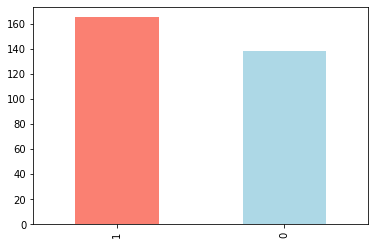

In [49]:
df["target"].value_counts().plot(kind='bar', color=["salmon", "lightblue"]);

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [51]:
#is there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [52]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##heart disease frequancy according to sex

In [53]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [54]:
#compare target column with sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


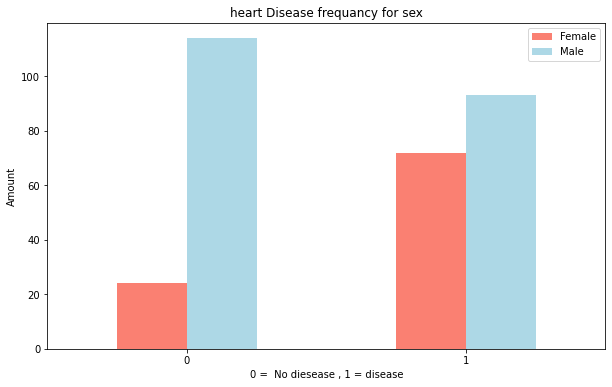

In [55]:
#create a plot of crosstab 
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"]);

plt.title("heart Disease frequancy for sex")
plt.xlabel("0 =  No diesease , 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [56]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


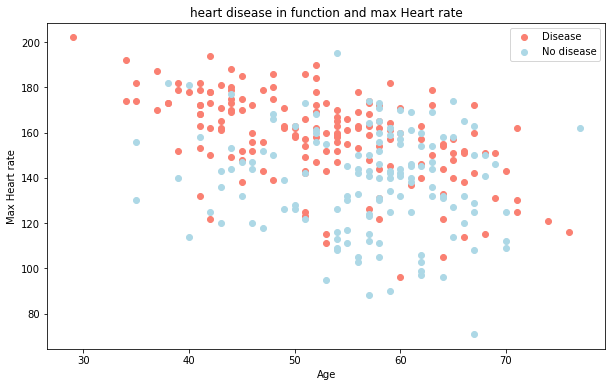

In [57]:
### create another figure
plt.figure(figsize=(10,6))

#scatter with positive example
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

# scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

#add some info
plt.title("heart disease in function and max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart rate")
plt.legend(["Disease", "No disease"]);

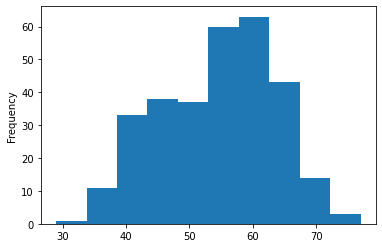

In [58]:
#check the distribution of the age column with a histogram
df.age.plot.hist();

### heart disease freuancy per chest pain type

cp - chest pain type 
-0: Typical angina: chest pain related decrease blood supply to the heart 
-1: Atypical angina: chest pain not related to heart 
-2: Non-anginal pain: typically esophageal spasms (non heart related) 
-3: Asymptomatic: chest pain not showing signs of disease

In [59]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


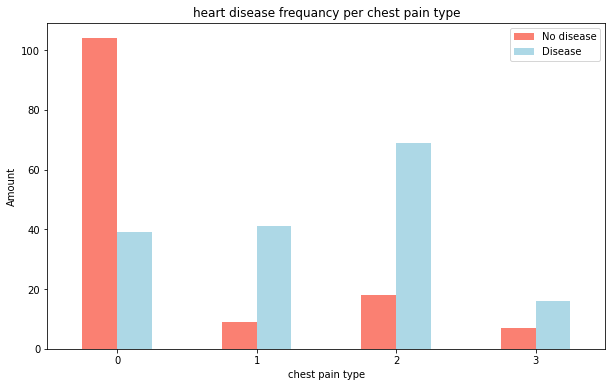

In [60]:
# make the crosstabe more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])
# add some communication
plt.title("heart disease frequancy per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

In [61]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
# make a corrolation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


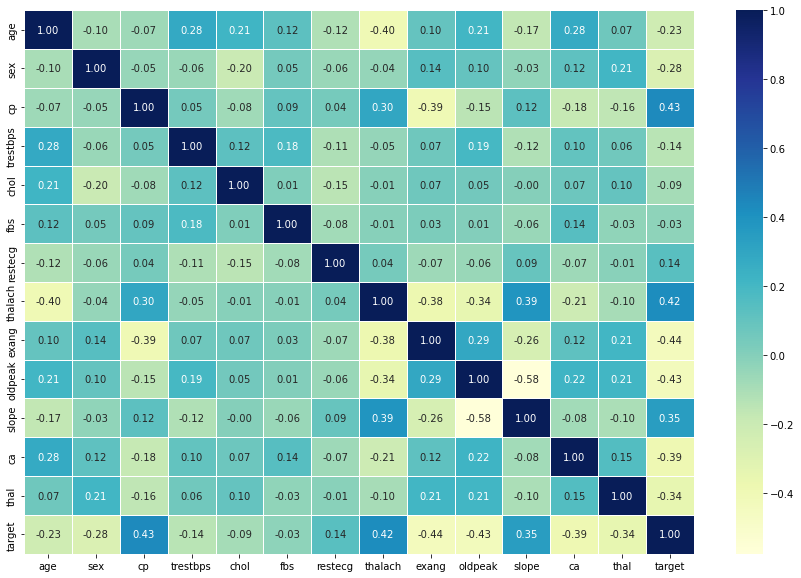

In [63]:
# lets make corealtion matrix a littel prittier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

# moduling

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
# split data in x and y
x = df.drop("target", axis=1)

y = df["target"]

In [66]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [67]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [68]:

# split data into train and test sets
np.random.seed(42)

# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [69]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [70]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

now we've got our data split into training and test, now time to build machine learning model

we'll train it (find the pattern) on training set.

And we'll test it (use the pattern) on the test set.

we going to try 3 differnat  machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours classifier
3. Random  forest Classifier

In [71]:
# put models in dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN" : KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#create a function to fit and score model 
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    fits and evaluate given machine learning models.
    models : a dict of differnat scikit-learn macjine learning models
    x_train : training data(no labels)
    x_test : tesing data(no labels)
    y_train : training labels
    y_test : testing labels
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model score
    model_scores = {}
    # loop through models
    for name,model in models.items():
       #fit the model for the data 
        model.fit(x_train, y_train)
        # Evaluate  the model and append its score to model_score
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [72]:
model_scores = fit_and_score(models=models,
                           x_train=x_train,
                           x_test=x_test,
                           y_train=y_train,
                           y_test=y_test)

model_scores

C:\Users\vinayak\Desktop\heart-disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# model comparison

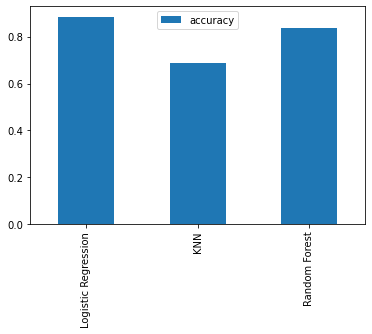

In [73]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

now we've got baseline model ... and we know amodels first predictions is'nt always what e should base our
next step off.
what should we do?

lets look at following
* hypyterparameter tunning
* feature importance
* confusion matrix
* cross-validation 
* precision
* Recall
* f1 score
* classification report
* ROC curve
* area under curve (auc)


### Hyperparameter tuning  (by hand)

In [74]:
# lets tune KNN

train_scores = []
test_scores = []

#create a list of differant values for n_neighbors 
neighbors = range(1, 21)

#setup KNN instance
knn = KNeighborsClassifier()

# loop through differant n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algoritham
    knn.fit(x_train, y_train)
    
    # update the training score list
    train_scores.append(knn.score(x_train, y_train ))
    
    # update the test scores list
    test_scores.append(knn.score(x_test, y_test))



In [75]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [76]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


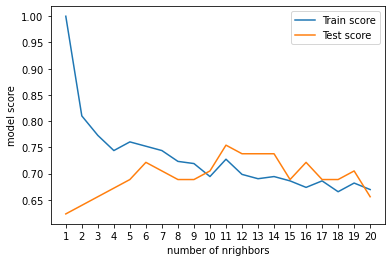

In [77]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("number of nrighbors")
plt.ylabel("model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### hyperparameter tuning with RandomizedSearchCV 

we goinf to tune :
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedsearchCV

In [78]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# create a hyperparameter grid for randomforestclassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
          "max_depth" : [None, 3, 5 , 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

now we;ve got hyperparameter grid setup for  each of our models, lets tune them using randomizedSearchCV

In [79]:
# Tune LogisticRegression 

np.random.seed(42)


#setup random hyperparameter search for logisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_reg_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# fit random hyperparameter search model for LogisticRefresion
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [80]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

now weve tuned LogisticRegression(), lets do the same the RandomforestClassifier


In [81]:
# setup random seed 
np.random.seed(42)

#setup random hyperparameters search for AARANDOMfORESTCLASSIFIER
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                          cv=5,
                          n_iter =20,
                          verbose = True)

#fit random hyperparameter search model for RandomForestclassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [82]:
# find best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [83]:
# evalute the randomized search Randomforestclassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [84]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

1. by hand
2. Randomizedsearchcv
3. gridsearchcv

## hyperparameter tuning using GridSearchCV

 since our logisticRegression model provides the best score so far well try and improve them using
 Gridserchcv

In [87]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [88]:
#cheack the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [89]:
#evaluating the grid search logisticregression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

## evaluting our tuned machine learning classsifier , beound accuracy
* roc curve and AUC score
* confusion matrix
* classification report
* precision 
* Recall
* f1 score

... and it will be great if cross validation was used where possible


In [91]:
# make prediction with tuned model
y_preds = gs_log_reg.predict(x_test)

In [92]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [93]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

C:\Users\vinayak\Desktop\heart-disease\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


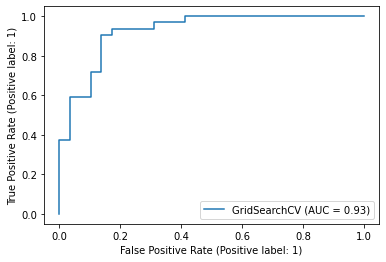

In [94]:
# plot ROC curve and calculate Auc metric
plot_roc_curve(gs_log_reg, x_test, y_test)

In [95]:
# confusion metrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


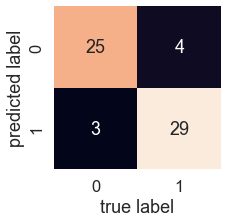

In [98]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plot a nice looking  confusion matrix using seaborns heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)
    

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score.



In [99]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [100]:
# check best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [102]:
# create a new classifier with best parameters
clf = LogisticRegression(C =0.20433597178569418,
                       solver = "liblinear")

In [104]:
# cross validated precision
cv_precision = cross_val_score(clf,
                              x,
                              y,
                              cv=5,
                              scoring="precision")
cv_precision= np.mean(cv_precision)
cv_precision

0.8215873015873015

In [114]:
# cross validated accuarcy 
cv_acc = cross_val_score(clf,
                          x,
                           y,
                              cv=5,
                              scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [105]:
# cross validated recall
cv_recall = cross_val_score(clf,
                              x,
                              y,
                              cv=5,
                              scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [106]:
# cross validated f1 score
cv_f1 = cross_val_score(clf,
                              x,
                              y,
                              cv=5,
                              scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

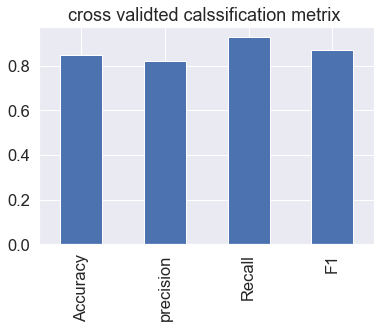

In [115]:
# visualize cross validated matrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "precision" : cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index= [0])
cv_metrics.T.plot.bar(title = "cross validted calssification metrix ",
                     legend = None);

## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [117]:
# fit an instance of LogisticRegression 
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [118]:
# cheack coef_
clf.coef_

array([[ 0.00316728, -0.86044622,  0.66067059, -0.01156993, -0.00166374,
         0.04386122,  0.31275815,  0.02459361, -0.60413062, -0.5686283 ,
         0.45051625, -0.63609881, -0.67663383]])

In [119]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [120]:
# match coef;s of  featuree to colums 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672775089892488,
 'sex': -0.8604462193284903,
 'cp': 0.6606705857793441,
 'trestbps': -0.01156993031867032,
 'chol': -0.0016637442407918324,
 'fbs': 0.04386122408903933,
 'restecg': 0.31275815497333875,
 'thalach': 0.024593612835517458,
 'exang': -0.6041306248075571,
 'oldpeak': -0.5686282991341255,
 'slope': 0.4505162464116119,
 'ca': -0.6360988070697587,
 'thal': -0.6766338279094292}

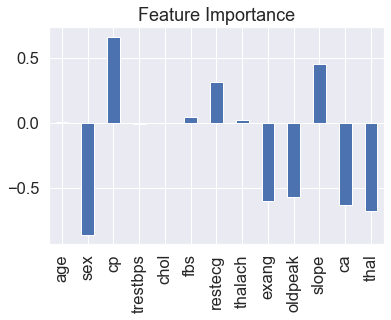

In [121]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [122]:
pd.crosstab(df["sex"], df["target"])


target,0,1
sex,,
0,24,72
1,114,93


In [123]:
pd.crosstab(df["slope"], df["target"])


target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart

## 6. Experimentation
If you haven't hit your evaluation metric yet... ask yourself...

Could you collect more data?
Could you try a better model? Like CatBoost or XGBoost?
Could you improve the current models? (beyond what we've done so far)
If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?